In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import MeCab
from gensim import corpora 
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [3]:
model_path = 'word2vec.gensim.model'
model = Word2Vec.load(model_path)

mecab = MeCab.Tagger("-Ochasen")

mecab.parse('')

'EOS\n'

In [6]:
def dist_kyoten(lst):
    try:
        r=requests.get(lst[1])
        soup=BeautifulSoup(r.content,'html.parser')
        l=[]
        for i in soup.find_all():

            if i.string is not None and i.name not in ('script'):

                node = mecab.parseToNode(i.string)

                while node:
                    if node.feature.split(u",")[0] == u"名詞" and node.feature.split(u",")[1] in (u"固有名詞", u"一般"):
                        if node.surface in model.wv.vocab:
                            l.append([lst[0],i.name,node.surface,model.similarity(node.surface,'拠点')])
                    node = node.next
        return l
    except:
        print("ERROR:", lst[0])

def dist_kojo(lst):
    try:
        r=requests.get(lst[1])
        soup=BeautifulSoup(r.content,'html.parser')
        l=[]
        for i in soup.find_all():

            if i.string is not None and i.name not in ('script'):

                node = mecab.parseToNode(i.string)

                while node:
                    if node.feature.split(u",")[0] == u"名詞" and node.feature.split(u",")[1] in (u"固有名詞", u"一般"):
                        if node.surface in model.wv.vocab:
                            l.append([lst[0],i.name,node.surface,model.similarity(node.surface,'工場')])
                    node = node.next
        return l
    except:
        print("ERROR:", lst[0])
        

In [7]:
l=[[1,'～'],
[2,'～']
]

#“拠点”との類似度
r=list(map(dist_kyoten,l))
#“工場”との類似度
k=list(map(dist_kojo,l))

ERROR: 12
ERROR: 212
ERROR: 12
ERROR: 212


In [11]:
r[:5]

[[[1, 'title', 'Honda', 0.10209291793238374],
  [1, 'title', '会社', 0.41019433714938713],
  [1, 'title', '会社', 0.41019433714938713],
  [1, 'title', '概要', 0.085894521454771305],
  [1, 'title', 'Honda', 0.10209291793238374],
  [1, 'title', 'グループ', 0.26453416120094497],
  [1, 'title', '拠点', 1.0],
  [1, 'h1', 'Honda', 0.10209291793238374],
  [1, 'h1', 'The', -0.097591406677765391],
  [1, 'h1', 'Power', 0.019288906832239956],
  [1, 'h1', 'of', -0.11564913902089001],
  [1, 'h1', 'Dreams', -0.075100814756306519],
  [1, 'a', 'Honda', 0.10209291793238374],
  [1, 'a', 'The', -0.097591406677765391],
  [1, 'a', 'Power', 0.019288906832239956],
  [1, 'a', 'of', -0.11564913902089001],
  [1, 'a', 'Dreams', -0.075100814756306519],
  [1, 'li', 'ニュース', 0.18186148664991872],
  [1, 'a', 'ニュース', 0.18186148664991872],
  [1, 'li', 'IR', 0.035907037175343687],
  [1, 'li', '情報', 0.28690670344648217],
  [1, 'a', 'IR', 0.035907037175343687],
  [1, 'a', '情報', 0.28690670344648217],
  [1, 'li', '情報', 0.28690670344648

In [12]:
k[:5]

[[[1, 'title', 'Honda', 0.15267932227711858],
  [1, 'title', '会社', 0.67398959049058493],
  [1, 'title', '会社', 0.67398959049058493],
  [1, 'title', '概要', -0.10825935266088783],
  [1, 'title', 'Honda', 0.15267932227711858],
  [1, 'title', 'グループ', 0.32570055025880484],
  [1, 'title', '拠点', 0.4238847930125868],
  [1, 'h1', 'Honda', 0.15267932227711858],
  [1, 'h1', 'The', -0.12336579780520326],
  [1, 'h1', 'Power', 0.11264779636068578],
  [1, 'h1', 'of', -0.22640346158500396],
  [1, 'h1', 'Dreams', -0.14667372860240277],
  [1, 'a', 'Honda', 0.15267932227711858],
  [1, 'a', 'The', -0.12336579780520326],
  [1, 'a', 'Power', 0.11264779636068578],
  [1, 'a', 'of', -0.22640346158500396],
  [1, 'a', 'Dreams', -0.14667372860240277],
  [1, 'li', 'ニュース', 0.021250144509582319],
  [1, 'a', 'ニュース', 0.021250144509582319],
  [1, 'li', 'IR', 0.19720272531604049],
  [1, 'li', '情報', -0.039159872951196363],
  [1, 'a', 'IR', 0.19720272531604049],
  [1, 'a', '情報', -0.039159872951196363],
  [1, 'li', '情報', -0.

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import cross_validation

In [16]:
df_kyoten1=pd.DataFrame(columns=['id', 'tag' ,'text', 'sim'])

for i in range(len(r)):
    df0=pd.DataFrame(r[i],columns=['id', 'tag' ,'text', 'sim'])
    df_kyoten1=df_kyoten1.append(df0, ignore_index = True)

In [17]:
df_kyoten1

,id,tag,text,sim
0,1,title,Honda,0.102093
1,1,title,会社,0.410194
2,1,title,会社,0.410194
3,1,title,概要,0.085895
4,1,title,Honda,0.102093
5,1,title,グループ,0.264534
6,1,title,拠点,1.000000
7,1,h1,Honda,0.102093
8,1,h1,The,-0.097591
9,1,h1,Power,0.019289


In [18]:
df_kyoten2=pd.DataFrame(df_kyoten1.groupby(['id', 'tag'])["sim"].max(),columns=[ 'sim'])
df_kyoten2

sim
id  tag                 
1   a           1.000000
    br          0.019289
    dd          0.570119
    dt          0.473633
    em          0.131870
    h1          0.264534
    h2          0.397933
    h3          0.373027
    h4          0.599477
    li          1.000000
    span       -0.214364
    td          0.550029
    th          0.160455
    title       1.000000
2   a           1.000000
    dd          0.577753
    div         0.263620
    dt          0.414290
    h1          1.000000
    li          1.000000
    title       1.000000
3   a           0.384367
    dd          0.339141
    h1          1.000000
    h3          0.410194
    h4          0.396248
    li          0.286907
    span        0.384367
    td          0.459132
    th          0.459132
...                  ...
225 title       0.286907
226 a           0.071017
    title       0.286907
227 a           0.372455
    h2          0.372455
    li          0.372455
    span        0.372455
    title       0.286907
228 a           1.000000
    h2          0.286907
    h3          0.410194
    h4          0.234309
    li          1.000000
    small       0.244511
    span        0.410194
    title       0.286907
229 title       0.100243
230 a           1.000000
    div         0.119925
    dt          0.298313
    em          0.286907
    figcaption  0.410194
    h1          0.286907
    h2          0.410194
    h3          0.374243
    li          1.000000
    small       0.244511
    span        0.410194
    td          0.124585
    title       0.313607

[737 rows x 1 columns]

In [19]:
df_kyoten3=df_kyoten2.reset_index()
df_kyoten3

,id,tag,sim
0,1,a,1.000000
1,1,br,0.019289
2,1,dd,0.570119
3,1,dt,0.473633
4,1,em,0.131870
5,1,h1,0.264534
6,1,h2,0.397933
7,1,h3,0.373027
8,1,h4,0.599477
9,1,li,1.000000


In [21]:
df_kyoten4=df_kyoten3.pivot(index='id', columns='tag', values='sim')
df_kyoten4

tag,a,abbr,address,b,br,button,caption,dd,div,dt,...,small,span,strong,style,sup,td,th,time,title,ul
id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,NaN,0.019289,NaN,NaN,0.570119,NaN,0.473633,...,NaN,-0.214364,NaN,NaN,NaN,0.550029,0.160455,NaN,1.000000,NaN
2,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.263620,0.414290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
3,0.384367,NaN,NaN,NaN,NaN,NaN,NaN,0.339141,NaN,NaN,...,NaN,0.384367,NaN,NaN,NaN,0.459132,0.459132,NaN,1.000000,NaN
4,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121215,NaN,...,0.478135,0.072431,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
5,0.572969,-0.024134,NaN,0.033065,NaN,NaN,NaN,0.583583,0.384367,0.572969,...,NaN,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
6,0.478135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459132,NaN,...,0.577753,0.459132,NaN,NaN,NaN,0.577753,NaN,NaN,0.459132,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079282,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
9,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.599477,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [22]:
df_kyoten5=df_kyoten4.reset_index()
df_kyoten5

tag,id,a,abbr,address,b,br,button,caption,dd,div,...,small,span,strong,style,sup,td,th,time,title,ul
0,1,1.000000,NaN,NaN,NaN,0.019289,NaN,NaN,0.570119,NaN,...,NaN,-0.214364,NaN,NaN,NaN,0.550029,0.160455,NaN,1.000000,NaN
1,2,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.263620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
2,3,0.384367,NaN,NaN,NaN,NaN,NaN,NaN,0.339141,NaN,...,NaN,0.384367,NaN,NaN,NaN,0.459132,0.459132,NaN,1.000000,NaN
3,4,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121215,...,0.478135,0.072431,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
4,5,0.572969,-0.024134,NaN,0.033065,NaN,NaN,NaN,0.583583,0.384367,...,NaN,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
5,6,0.478135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459132,...,0.577753,0.459132,NaN,NaN,NaN,0.577753,NaN,NaN,0.459132,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079282,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
8,9,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
9,10,0.237635,NaN,NaN,0.372455,NaN,NaN,NaN,NaN,NaN,...,0.263620,0.372455,NaN,NaN,NaN,0.369936,0.372455,NaN,1.000000,NaN


In [25]:
df_kyoten6=df_kyoten5.fillna(df_kyoten5.mean())
df_kyoten6

tag,id,a,abbr,address,b,br,button,caption,dd,div,...,small,span,strong,style,sup,td,th,time,title,ul
0,1,1.000000,-0.024134,0.244511,0.087651,0.019289,0.263492,0.499854,0.570119,0.303757,...,0.286972,-0.214364,0.400543,0.018494,0.115111,0.550029,0.160455,-0.155466,1.000000,-0.106912
1,2,1.000000,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.577753,0.263620,...,0.286972,0.398081,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,1.000000,-0.106912
2,3,0.384367,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.339141,0.303757,...,0.286972,0.384367,0.400543,0.018494,0.115111,0.459132,0.459132,-0.155466,1.000000,-0.106912
3,4,0.410194,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.421644,0.121215,...,0.478135,0.072431,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,0.410194,-0.106912
4,5,0.572969,-0.024134,0.244511,0.033065,0.213756,0.263492,0.499854,0.583583,0.384367,...,0.286972,0.410194,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,0.410194,-0.106912
5,6,0.478135,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.421644,0.459132,...,0.577753,0.459132,0.400543,0.018494,0.115111,0.577753,0.459500,-0.155466,0.459132,-0.106912
6,7,0.587843,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.421644,-0.079282,...,0.286972,1.000000,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,1.000000,-0.106912
7,8,0.587843,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.421644,0.303757,...,0.286972,0.398081,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,1.000000,-0.106912
8,9,1.000000,-0.024134,0.244511,0.087651,0.213756,0.263492,0.499854,0.421644,0.577753,...,0.286972,1.000000,0.400543,0.018494,0.115111,0.396693,0.459500,-0.155466,1.000000,-0.106912
9,10,0.237635,-0.024134,0.244511,0.372455,0.213756,0.263492,0.499854,0.421644,0.303757,...,0.263620,0.372455,0.400543,0.018494,0.115111,0.369936,0.372455,-0.155466,1.000000,-0.106912


In [42]:
xv=df_kyoten6.drop('id', axis=1)
yv=df_kyoten6["id"].apply( lambda x: 1 if x <= 99 else 0 )
a=xv.values

class x:
    def __init__(self, code, name):
        x.values = values
        x.name = name

x.values=[[float(a[i][j]) for j in range(len(a[i]))] for i in range(len(a))]
x.label=xv.columns.values

y=list(map(int,yv.values))

x_train,x_test,y_train,y_test=train_test_split(x.values,y,stratify=y,random_state=66)

In [43]:
#ロジスティック回帰
log001 = LogisticRegression(C=0.01)
log001.fit(x_train, y_train)
print("C=0.01 再代入誤り率：",1-log001.score(x_train,y_train))
print("C=0.01 ホールドアウト誤り率：",1-log001.score(x_test,y_test))

log1 = LogisticRegression(C=1)
log1.fit(x_train, y_train)
print("C=1 再代入誤り率：",1-log1.score(x_train,y_train))
print("C=1 ホールドアウト誤り率：",1-log1.score(x_test,y_test))

log100 = LogisticRegression(C=100)
log100.fit(x_train, y_train)
print("C=100 再代入誤り率：",1-log100.score(x_train,y_train))
print("C=100 ホールドアウト誤り率：",1-log100.score(x_test,y_test))

log10000 = LogisticRegression(C=10000)
log10000.fit(x_train, y_train)
print("C=10000 再代入誤り率：",1-log10000.score(x_train,y_train))
print("C=10000 ホールドアウト誤り率：",1-log10000.score(x_test,y_test))

C=0.01 再代入誤り率： 0.347826086957
C=0.01 ホールドアウト誤り率： 0.333333333333
C=1 再代入誤り率： 0.130434782609
C=1 ホールドアウト誤り率： 0.125
C=100 再代入誤り率： 0.0579710144928
C=100 ホールドアウト誤り率： 0.0416666666667
C=10000 再代入誤り率： 0.0289855072464
C=10000 ホールドアウト誤り率： 0.0416666666667


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f00a822b390>,
 <a list of 36 Text xticklabel objects>)

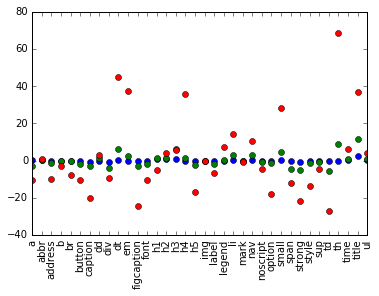

In [44]:
plt.plot(log1.coef_.T,'o',label='C=1')
plt.plot(log100.coef_.T,'o',label='C=100')
plt.plot(log10000.coef_.T,'o',label='C=10000')

plt.xticks(range(len(x.label)),x.label,rotation=90)

In [45]:
#工場
df_kojo1=pd.DataFrame(columns=['id', 'tag' ,'text', 'sim'])

for i in range(len(k)):
    df0=pd.DataFrame(k[i],columns=['id', 'tag' ,'text', 'sim'])
    df_kojo1=df_kyoten1.append(df0, ignore_index = True)

In [46]:
df2=pd.DataFrame(df_kojo1.groupby(['id', 'tag'])["sim"].max(),columns=[ 'sim'])
df3=df2.reset_index()
df4=df3.pivot(index='id', columns='tag', values='sim')
df5=df4.reset_index()
df6=df5.fillna(df5.mean())
xv=df6.drop('id', axis=1)
yv=df6["id"].apply( lambda x: 1 if x <= 99 else 0 )
a=xv.values

class x:
    def __init__(self, code, name):
        x.values = values
        x.name = name

x.values=[[float(a[i][j]) for j in range(len(a[i]))] for i in range(len(a))]
x.label=xv.columns.values

y=list(map(int,yv.values))

x_train,x_test,y_train,y_test=train_test_split(x.values,y,stratify=y,random_state=77)

In [47]:
#ロジスティック回帰
log001 = LogisticRegression(C=0.01)
log001.fit(x_train, y_train)
print("C=0.01 再代入誤り率：",1-log001.score(x_train,y_train))
print("C=0.01 ホールドアウト誤り率：",1-log001.score(x_test,y_test))

log1 = LogisticRegression(C=1)
log1.fit(x_train, y_train)
print("C=1 再代入誤り率：",1-log1.score(x_train,y_train))
print("C=1 ホールドアウト誤り率：",1-log1.score(x_test,y_test))

log100 = LogisticRegression(C=100)
log100.fit(x_train, y_train)
print("C=100 再代入誤り率：",1-log100.score(x_train,y_train))
print("C=100 ホールドアウト誤り率：",1-log100.score(x_test,y_test))

log10000 = LogisticRegression(C=10000)
log10000.fit(x_train, y_train)
print("C=10000 再代入誤り率：",1-log10000.score(x_train,y_train))
print("C=10000 ホールドアウト誤り率：",1-log10000.score(x_test,y_test))

C=0.01 再代入誤り率： 0.347826086957
C=0.01 ホールドアウト誤り率： 0.333333333333
C=1 再代入誤り率： 0.115942028986
C=1 ホールドアウト誤り率： 0.125
C=100 再代入誤り率： 0.0289855072464
C=100 ホールドアウト誤り率： 0.166666666667
C=10000 再代入誤り率： 0.0144927536232
C=10000 ホールドアウト誤り率： 0.208333333333


([<matplotlib.axis.XTick at 0x7f00a86a10f0>,
 <a list of 36 Text xticklabel objects>)

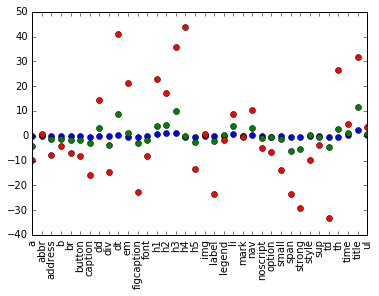

In [48]:
plt.plot(log1.coef_.T,'o',label='C=1')
plt.plot(log100.coef_.T,'o',label='C=100')
plt.plot(log10000.coef_.T,'o',label='C=10000')

plt.xticks(range(len(x.label)),x.label,rotation=90)